# CS5616 - NLP - A2 - POS Tagging

## 209338R - KATS Jayathilaka

#### -----------------------------------------------------------------------------------------------------

### Importing and downloading NLTK Library and Data

In [1]:
import nltk
import os

##### You have to change this directory according to your system. Otherwise, `nltk.download()` will always be invoked.

In [2]:
# I am KATS Jayathilaka - SINGHABAHU is my nickname
NLTK_DATA_PATH_CHECK = '/home/singhabahu/nltk_data/'

In [3]:
if not os.path.exists(NLTK_DATA_PATH_CHECK):
    nltk.download()

### Reading `annotate.txt` file

In [4]:
datafile = open('annotate.txt', 'r', encoding = 'utf-8')
raw_data = datafile.read()
datafile.close()

### Removing all numbers

In [5]:
import re
nonum_data = re.sub(r'\d+', '', raw_data)

### Removing all punctuation marks

In [6]:
import string
nopunc_data = nonum_data.translate(str.maketrans("","", string.punctuation))

### Removing leading and trailing whitespaces

In [7]:
stripped_data = nopunc_data.strip()

### Preprocessed data

In [8]:
data = stripped_data

#### -----------------------------------------------------------------------------------------------------

### Tokenization

In [9]:
tokens = nltk.word_tokenize(data)

### POS Tagging

#### Checking different POS tag sets

In [10]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [11]:
nltk.help.claws5_tagset()

AJ0: adjective (unmarked)
    good, old
AJC: comparative adjective
    better, older
AJS: superlative adjective
    best, oldest
AT0: article
    THE, A, AN
AV0: adverb (unmarked)
    often, well, longer, furthest
AVP: adverb particle
    up, off, out
AVQ: wh-adverb
    when, how, why
CJC: coordinating conjunction
    and, or
CJS: subordinating conjunction
    although, when
CJT: the conjunction THAT
    that
CRD: cardinal numeral
    3, fifty-five, 6609 (excl one)
DPS: possessive determiner form
    your, their
DT0: general determiner
    these, some
DTQ: wh-determiner
    whose, which
EX0: existential THERE
    there
ITJ: interjection or other isolate
    oh, yes, mhm
NN0: noun (neutral for number)
    aircraft, data
NN1: singular noun
    pencil, goose
NN2: plural noun
    pencils, geese
NP0: proper noun
    London, Michael, Mars
NULL: the null tag (for items not to be tagged)
ORD: ordinal
    sixth, 77th, last
PNI: indefinite pronoun
    none, everything
PNP: personal pronoun
    y

In [12]:
nltk.help.brown_tagset()

(: opening parenthesis
    (
): closing parenthesis
    )
*: negator
    not n't
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ? ; ! :
:: colon
    :
ABL: determiner/pronoun, pre-qualifier
    quite such rather
ABN: determiner/pronoun, pre-quantifier
    all half many nary
ABX: determiner/pronoun, double conjunction or pre-quantifier
    both
AP: determiner/pronoun, post-determiner
    many other next more last former little several enough most least only
    very few fewer past same Last latter less single plenty 'nough lesser
    certain various manye next-to-last particular final previous present
    nuf
AP$: determiner/pronoun, post-determiner, genitive
    other's
AP+AP: determiner/pronoun, post-determiner, hyphenated pair
    many-much
AT: article
    the an no a every th' ever' ye
BE: verb 'to be', infinitive or imperative
    be
BED: verb 'to be', past tense, 2nd person singular or all persons plural
    were
BED*: verb 'to be', past tense, 2nd person singular or 

#### Checking different corpora in NLTK

In [13]:
from nltk.corpus import treebank
from nltk.corpus import brown
from nltk.corpus import gutenberg

In [14]:
print(len(treebank.words()))
treebank.words()

100676


['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', ...]

In [15]:
print(len(brown.words()))
brown.words()

1161192


['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

##### Checking whether some none tagged words are included in the Brown corpus.

In [79]:
for w in brown.words():
    if w == 'oop' or w == 'madam' or w == 'uncompleted' or w == 'poymorphism':
        print(w)

madam


In [16]:
print(len(gutenberg.words()))
gutenberg.words()

2621613


['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

### Training different POS Taggers using Brown Corpus

#### Defining common functions to output the tagged corpus for the dataset `annotate.txt`

In [17]:
def create_tagged_corpus(tagged_list):
    tagged_corpus = ''
    for tagged in tagged_list:
        tag = tagged[1]
        if tagged[1] is None:
            tag = 'NONE'
        tagged_corpus += tagged[0] + '/' + tag + ' '
    return tagged_corpus

def save_corpus(name, corpus):
    f = open(name, 'w')
    f.write(corpus)
    f.close()

#### Splitting Brown corpus to train & test sets

In [18]:
brown_tagged_sents = brown.tagged_sents()
brown_ts_len = len(brown_tagged_sents)
train_sents = brown_tagged_sents[:int(brown_ts_len*0.8)]
test_sents = brown_tagged_sents[int(brown_ts_len*0.8):]

#### 1. Training & using UnigramTagger
http://www.nltk.org/api/nltk.tag.html?highlight=unigramtagger#nltk.tag.sequential.UnigramTagger

In [19]:
from nltk.tag import UnigramTagger

In [20]:
unigram_tagger = UnigramTagger(train_sents)

In [21]:
unigram_tagger.evaluate(test_sents)

0.8773754310202373

In [22]:
tagged_corpus_by_unigram = unigram_tagger.tag(tokens)
tagged_corpus_by_unigram

[('Lectures', 'NNS-TL'),
 ('were', 'BED'),
 ('really', 'RB'),
 ('good', 'JJ'),
 ('There', 'EX'),
 ('were', 'BED'),
 ('lot', 'NN'),
 ('of', 'IN'),
 ('people', 'NNS'),
 ('who', 'WPS'),
 ('came', 'VBD'),
 ('their', 'PP$'),
 ('without', 'IN'),
 ('any', 'DTI'),
 ('Java', 'NP'),
 ('knowledge', 'NN'),
 ('and', 'CC'),
 ('yet', 'RB'),
 ('you', 'PPSS'),
 ('were', 'BED'),
 ('very', 'QL'),
 ('supportive', 'JJ'),
 ('for', 'IN'),
 ('me', 'PPO'),
 ('Its', 'PP$'),
 ('really', 'RB'),
 ('good', 'JJ'),
 ('that', 'CS'),
 ('the', 'AT'),
 ('lecturer', 'NN'),
 ('explains', 'VBZ'),
 ('most', 'QL'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('concepts', 'NNS'),
 ('using', 'VBG'),
 ('examples', 'NNS'),
 ('It', 'PPS'),
 ('helps', 'VBZ'),
 ('us', 'PPO'),
 ('to', 'TO'),
 ('understand', 'VB'),
 ('them', 'PPO'),
 ('better', 'JJR'),
 ('But', 'CC'),
 ('if', 'CS'),
 ('you', 'PPSS'),
 ('are', 'BER'),
 ('sitting', 'VBG'),
 ('at', 'IN'),
 ('the', 'AT'),
 ('back', 'RB'),
 ('you', 'PPSS'),
 ('cant', 'NN'),
 ('properly', 'RB'),
 ('see

In [ ]:
save_corpus('tagged_corpus_by_unigram.txt', create_tagged_corpus(tagged_corpus_by_unigram))

#### 2. Training & using CRFTagger
http://www.nltk.org/api/nltk.tag.html#module-nltk.tag.crf

In [24]:
from nltk.tag import CRFTagger

##### Graph demonstration on how the train time increases for CRFTagger as the train tagged sentences increases.

In [82]:
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
len(train_sents)
counts = [10,20]
# counts = [10,20,40,80,160,320,640,1280,2560,5120]
times = []

In [53]:
for count in counts:
    start = time.time()
    crf_tagger = CRFTagger()
    crf_tagger.train(train_sents[:count], 'model.crf.tagger')
    end = time.time()
    times.append(end-start)

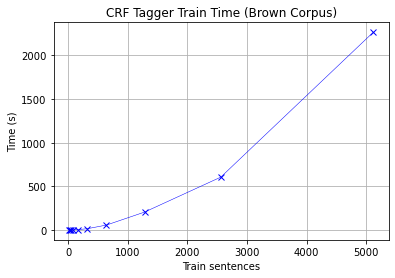

In [57]:
plt.xlabel('Train sentences')
plt.ylabel('Time (s)')
plt.title('CRF Tagger Train Time (Brown Corpus)')
plt.grid(True)
plt.plot(counts, times, 'x-b', linewidth='0.5')
plt.savefig('CRFTagger Train Time (Brown Corpus).png', dpi=480)

In [64]:
crf_tagger = CRFTagger()
crf_tagger.train(train_sents[:2000], 'model.crf.tagger')

In [65]:
crf_tagger.evaluate(test_sents[:500])

0.8749312809235844

In [80]:
tagged_corpus_by_crf = crf_tagger.tag(tokens)
tagged_corpus_by_crf

[('Lectures', 'NNS-TL'),
 ('were', 'BED'),
 ('really', 'RB'),
 ('good', 'VBD'),
 ('There', 'EX'),
 ('were', 'BED'),
 ('lot', 'VBN'),
 ('of', 'IN'),
 ('people', 'NNS'),
 ('who', 'WPS'),
 ('came', 'VBD'),
 ('their', 'PP$'),
 ('without', 'IN'),
 ('any', 'DTI'),
 ('Java', 'NP'),
 ('knowledge', 'NN'),
 ('and', 'CC'),
 ('yet', 'VBD'),
 ('you', 'PPSS'),
 ('were', 'BED'),
 ('very', 'QL'),
 ('supportive', 'JJ'),
 ('for', 'IN'),
 ('me', 'NN'),
 ('Its', 'VBZ'),
 ('really', 'RB'),
 ('good', 'JJ'),
 ('that', 'CS'),
 ('the', 'AT'),
 ('lecturer', 'NN'),
 ('explains', 'VBZ'),
 ('most', 'AP'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('concepts', 'NNS'),
 ('using', 'VBG'),
 ('examples', 'NNS'),
 ('It', 'PPS'),
 ('helps', 'VBZ'),
 ('us', 'NNS'),
 ('to', 'TO'),
 ('understand', 'VB'),
 ('them', 'PPO'),
 ('better', 'JJR'),
 ('But', 'CC'),
 ('if', 'CS'),
 ('you', 'PPSS'),
 ('are', 'BER'),
 ('sitting', 'VBG'),
 ('at', 'IN'),
 ('the', 'AT'),
 ('back', 'NN'),
 ('you', 'PPSS'),
 ('cant', 'VB'),
 ('properly', 'RB'),
 ('s

In [ ]:
save_corpus('tagged_corpus_by_crf.txt', create_tagged_corpus(tagged_corpus_by_crf))

#### 3. Training & using PerceptronTagger
http://www.nltk.org/api/nltk.tag.html#module-nltk.tag.perceptron

In [84]:
from nltk.tag import PerceptronTagger

In [85]:
perceptron_tagger = PerceptronTagger()
perceptron_tagger.train(train_sents)

In [ ]:
perceptron_tagger.evaluate(test_sents)

In [ ]:
tagged_corpus_by_perceptron = perceptron_tagger.tag(tokens)
tagged_corpus_by_perceptron

In [ ]:
save_corpus('tagged_corpus_by_perceptron.txt', create_tagged_corpus(tagged_corpus_by_perceptron))